In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Background Equations

$$ \sigma''(\tau) - 2 \frac{\sigma'(\tau)}{\tau} + \frac{\sigma(\tau)}{\tau^2}(m_{\sigma}^2 + g \phi(t)^2)$$

$$ \phi'(t) = \sqrt{2 \frac{\epsilon}{\tau^2} - \sigma'(t)^2}$$

Rewriting in terms of first order equations:

$$\sigma'(t)=\sigma_p(t)$$

$$ \sigma_p'(\tau) - 2 \frac{\sigma_p(\tau)}{\tau} + \frac{\sigma(\tau)}{\tau^2}(m_{\sigma}^2 + g \phi(t)^2)$$

$$ \phi'(t) = \sqrt{2 \frac{\epsilon}{\tau^2} - \sigma_p(t)^2}$$

#### Code Notation

$$\phi(t): y[0]$$
$$\sigma(t): y[1]$$
$$\sigma_p(t): y[2]$$

In [118]:
H, m, g, epsilon, s_prime0, s0, phi0 = 1,0.1, 0.1, 0.0001, 0.0, 0.00001, 0.01

In [155]:
def background_ode(t, y):
   
    dydt = [np.sqrt(2*(epsilon/t**2)  - y[2]**2 + 0j), y[2], 2* (y[2]/t) - y[1]*(m**2+ g * y[0]**2)/t**2] 
    return dydt

In [150]:
tspan = np.linspace(-1000.0, -0.001, 10000)

In [151]:
yinit = [phi0+0j, s0+0j, s_prime0+0j]

In [152]:
sol_back = solve_ivp(lambda t, y: background_ode(t, y), [tspan[0], tspan[-1]], yinit, t_eval=tspan)

In [153]:
phi = sol_back.y[0]
sigma= sol_back.y[1]
sigmap= sol_back.y[2]
time  = sol_back.t

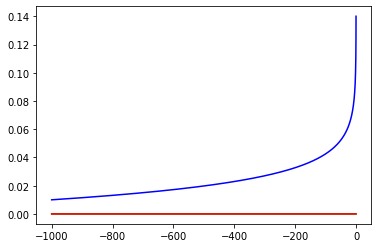

In [154]:
plt.plot(time[:-1], phi[:-1].real, 'b')
plt.plot(time[:-1], sigma[:-1].real, 'g')
plt.plot(time[:-1], sigmap[:-1].real, 'r')
#plt.plot(time[:-1], sigma[:-1].imag, 'c')
#plt.plot(time[:-1], sigmap[:-1].imag, 'm')
plt.show()

In [102]:
sigma

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [110]:
def check_real(var):
    bul = var.imag !=0
    for i,j in enumerate(bul):
        if j ==True:
            print(i)

In [111]:
check_real(sigma)

In [112]:
check_real(sigmap)

In [113]:
check_real(phi)

In [114]:
def D(sigmap,t):
    return sigmap**2 -2* epsilon/t**2

In [115]:
def Vp(sigma, phi):
    return (m**2 + g* phi**2)* sigma

In [171]:
def Vpd(sigma, sigmap, phi,t):
    return sigmap*(m**2+g*phi**2) + sigma* g* 2* phi* np.sqrt(2*(epsilon/t**2)  - sigmap**2 + 0j)

In [120]:
def f_C_coeff(sigma,sigmap, phi, t):
    return -sigmap*(5*(epsilon/t**2) - Vp(sigma, phi) * (sigmap/(t*H**2)) 
                    -(epsilon-2) * (sigmap)**2)/D(sigmap,t)

In [122]:
def f_Vp_term(sigma, sigmap, phi, t):
    return Vp(sigma, phi)*(-12*epsilon * (sigmap/t**3)
                           -(2+2*epsilon)*(sigmap**3/t))/((H*t * D(sigmap,t))**2)

In [124]:
def f_Vp2_term(sigma,sigmap, phi, t):
    return (2* epsilon* Vp(sigma, phi)**2)/((t**6)*(H**4)*D(sigmap, t)**2)

In [147]:
def f_Vpd_term(sigma, sigmap, phi, t):
    return sigmap * Vpd(sigma, sigmap, phi,t)/(D(sigmap, t)*(H*t)**2)

In [136]:
def f_k2_term(sigmap, t,k):
    return -(epsilon* k**2)/(2*D(sigmap,t)*t**2)

In [140]:
def f_rest_term(sigmap,t):
    return (65*epsilon *((sigmap**2)/t**4) -4*(epsilon-2)*(sigmap**4)/(t**2) 
            + 4* epsilon *(sigmap**2) *(2/t**4))/(2*D(sigmap,t)**2)

In [144]:
def g_C_coeff(sigma, sigmap,phi,t):
    return ((epsilon/t**2)*(-Vp(sigma, phi)/(t*H**2) - (2+epsilon)*sigmap) 
            + (sigmap**2)*((epsilon-2)*sigmap + Vp(sigma, phi)/(t*H**2)))/D(sigmap,t)

In [156]:
def g_Vp_term(sigma, sigmap,phi,t):
    return -sigmap*Vp(sigma, phi)*((10* epsilon/t**2) 
                                   + (3*epsilon-2)*sigmap**2)/((H**2)*(t**3)*D(sigmap,t)**2)

In [159]:
def g_Vp2_term(sigma,sigmap, phi, t):
    return ((5*epsilon/t**2) -2 * sigmap**2)*(Vp(sigma,phi)**2)/(2*((H*t)**4)*D(sigmap,t)**2)

In [162]:
def g_Vpp_term(sigmap, phi, t):
    return - epsilon *(m**2+ g* phi**2)/((H**2) *(t**4)* D(sigmap,t)*2)

In [172]:
def g_Vpd_term(sigma, sigmap, phi, t):
    return sigmap*Vpd(sigma, sigmap, phi,t)/(D(sigmap,t)*(H * t)**2)

In [175]:
def g_k2_term(sigmap, t, k):
    return - (epsilon* k**2)/(2*D(sigmap,t)*t**2)

In [178]:
def g_rest_term(sigmap,t):
    return (epsilon* 44* ((sigmap**2)/t**4) - (4-3*epsilon)* ((sigmap**4)/t**2)
            + 4*epsilon* D(sigmap,t)* (2/t**4))/(2*D(sigmap,t)**2)

In [179]:
g_rest_term(2,2)

-0.4999343733593442

### Perturbation Equations
Using: 
$$a =- \frac{1}{\tau H}, \quad M_p=1, \quad D = \sigma'^2-\frac{2 \epsilon}{\tau^2}$$

$A_k$ equation:
$$f_k'' = 2 \sigma' \left(\frac{3\sigma'}{D \tau} +\frac{C_k \tau}{f_k g_k}\right) f_k' - \frac{\epsilon}{2} \frac{C_k^2}{f_k g_k^2} + \frac{\sigma'}{D}\left(\frac{5 \epsilon}{\tau^2} -(\epsilon -2)\sigma'^2 +\frac{\partial_{\sigma}V \sigma'}{\tau H^2}\right)\frac{C_k}{g_k}$$

$$ -\left[- \frac{\partial_{\sigma}V \sigma'}{H^2 \tau^3 D^2} \left(\frac{4(3-2 \epsilon) \epsilon }{\tau^2} +(3+ 2 \epsilon) \sigma'^2\right) +  \frac{2 \epsilon (\partial_{\sigma}V)^2}{H^4 \tau^6 D^2} + \frac{\sigma'}{H^2 \tau^2 D} \partial_{\tau}\partial_{\sigma}V -\frac{\epsilon}{2 \tau^2 D} k^2 +\frac{\sigma'^2}{2 \tau^2 D^2}\left(\frac{(65-28 \epsilon+4 \epsilon^2)}{\tau^2}-4(\epsilon -2) \sigma'^2\right) +\frac{4 \epsilon}{D \tau^4}\right]f_k$$
 
 
$B_k$ equation:
$$g_k'' = 2 \sigma' \left(\frac{\partial_{\sigma}V}{D H^2 \tau^2} -\frac{\epsilon \sigma'}{D \tau} +\frac{C_k \tau}{f_k g_k}\right) g_k' - \frac{\epsilon}{2} \frac{C_k^2}{g_k f_k^2}+ \left(\sigma'\left((\epsilon-2) \sigma'^2 -(\epsilon+2)\frac{\epsilon}{\tau^2} \right) +\frac{\partial_{\sigma}V}{H^2} \left(\frac{\epsilon}{\tau^3} - \frac{\sigma'^2}{\tau}\right)\right)\frac{C_k}{D f_k}$$

 $$-\left[\frac{\partial_{\sigma}V \sigma'}{H^2 \tau^3 D^2} \left(\frac{(10-7 \epsilon) \epsilon }{\tau^2} +(3\epsilon -2) \sigma'^2\right) +  \left(\frac{5 \epsilon}{\tau^2} - 2 \sigma'^2\right) \frac{(\partial_{\sigma}V)^2}{2 H^4 \tau^4 D^2}- 
 \frac{\partial_{\sigma}^2 V \epsilon}{2 H^2 \tau^4 D} + \frac{\sigma'}{H^2 \tau^2 D} \partial_{\tau}\partial_{\sigma}V -\frac{\epsilon}{2 \tau^2 D} k^2 \right]g_k$$
 
$$ -\left[\frac{\sigma'^2}{2 \tau^2 D^2}\left(\frac{(44-18 \epsilon+ 3 \epsilon^2)}{\tau^2}-(4- 3 \epsilon +\epsilon^2) \sigma'^2\right) +\frac{4 \epsilon}{D \tau^4}\right]g_k$$
 
 
 $C_k$ equation:
 $$ C_k' = - \frac{C_k}{2 D}\left((3+\epsilon)\frac{\sigma'^2}{\tau} - \frac{\sigma' \partial_{\sigma} V}{H^2 \tau^2}\right) - \frac{f_k' g_k}{\epsilon D} \left(\frac{\partial_{\sigma} V}{\tau H^2} \left(\frac{\epsilon}{\tau^2} -\sigma'^2\right) +\sigma'\left((\epsilon -2) \sigma'^2 -(2+\epsilon) \frac{\epsilon}{\tau^2}\right)  \right) + \frac{g_k' f_k \sigma'}{\epsilon D} \left(\frac{\partial_{\sigma} V \sigma'}{\tau H^2} + \frac{5 \epsilon}{\tau^2} - (\epsilon -2) \sigma'^2\right)
 + \frac{\sigma' \tau}{\epsilon D} f_k' g_k' $$
 
$$ + \left[\frac{\sigma'}{2 \tau D} k^2 + \frac{\partial_{\sigma} V}{\epsilon D H^2 \tau^2} \left(\frac{\epsilon^2}{\tau^4} + 2\epsilon (1+\epsilon) \frac{\sigma'^2}{\tau^2} -2(\epsilon-2) \sigma'^4\right) +  \frac{(\partial_{\sigma} V)^2 \sigma'}{\epsilon \tau^3 H^4 D^2}\left(\sigma'^2-\frac{\epsilon}{\tau^2}\right)\right]f_kg_k$$

$$ +\left[ \frac{\sigma'}{2 \epsilon \tau D^2} \left(4\epsilon^2(5+\epsilon) \frac{1}{\tau^4} + (28-7 \epsilon -2\epsilon^2) \epsilon \frac{\sigma'^2}{\tau^2} + 2(\epsilon^2 - 4 \epsilon + 4) \sigma'^4\right)\right] f_k g_k 
 $$

ODE notation:

$$\phi: y[0]$$
$$\sigma: y[1]$$
$$\sigma_p: y[2]$$
$$f_k : y[3]$$
$$f'_k: y[4]$$
$$g_k: y[5]$$
$$g'_k: y[6]$$
$$C_k: y[7]$$

In [ ]:
def ode(t,y):
    dydt = [np.sqrt(2*(epsilon/t**2)  - y[2]**2 + 0j), y[2], 2* (y[2]/t) - y[1]*(m**2+ g * y[0]**2)/t**2,
            y[4], -(y[4]*2*y[2]*((-y[7] * t/ (y[3]*y[5])) + 3* y[2]/(t*D(y[2],t)))+ epsilon*y[7]**2 / (2* y[3]*y[5]**2)
            + y[7]*f_C_coeff(y[1],y[2],y[0])/y[5] + y[3]*(f_Vp_term(sigma, sigmap, phi, t)
            +  f_Vp2_term(sigma,sigmap, phi, t) +  f_Vpd_term(sigma, sigmap, phi, phip, t)
            +f_k2_term(sigmap, t,k)+f_rest_term(sigmap,t) )), y[6],-()  ,    C ]
    return dydt